# 森林火灾面积预测

#### 顾翔，沈贝宁、那铭心、季诚
#### 本题由顾翔负责
---
## 运行环境
* python3
* 安装有pandas、scikit-learn、numpy库
* 运行软件：Anaconda、jupyter notebook

### 一、数据处理
* 画出area的图标，可以看到大于400的两个点为明显的离群值，删掉
* 把起火面积不为0的数据展现出来，观察是否有无关数据，结合常识，排除DAY和MON,其他的只看图没办法排除
* 采用留出法，对去掉离群值后的515个样本，取412个（80%）作为训练集，103个（20%）作为测试集

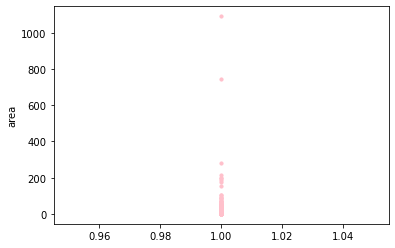

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

df=pd.read_csv("forestfires.csv")

x=np.ones((517,1))
plt.scatter(x,df['area'],color='pink',s=10.)
plt.ylabel('area')
plt.show()
mon=[]
for i in range(0,df['area'].values.shape[0]):
    if(df['month'][i]=='jan'):
        mon.append(1)
    elif(df['month'][i]=='feb'):
        mon.append(2)
    elif(df['month'][i]=='mar'):
        mon.append(3)
    elif(df['month'][i]=='apr'):
        mon.append(4)
    elif(df['month'][i]=='may'):
        mon.append(5)
    elif(df['month'][i]=='jul'):
        mon.append(6)
    elif(df['month'][i]=='jun'):
        mon.append(7)
    elif(df['month'][i]=='aug'):
        mon.append(8)
    elif(df['month'][i]=='sep'):
        mon.append(9)
    elif(df['month'][i]=='oct'):
        mon.append(10)
    elif(df['month'][i]=='nov'):
        mon.append(11)
    elif(df['month'][i]=='dec'):
        mon.append(12)
    
def minmax(name):
    data=(df[name]-df[name].min())/(df[name].max()-df[name].min())
    del df[name]
    df[name]=data
    
minmax('FFMC')
minmax('DMC')
minmax('DC')
minmax('ISI')
minmax('RH')
minmax('wind')
minmax('rain')
minmax('area')    
mon=np.asarray(mon)       
df=df.reset_index(drop=True)
del df['month']
del df['day']
df['month']=mon




In [11]:
train_x,test_x=train_test_split(df,train_size=0.8,random_state=10)
train_y=train_x['area']
del train_x['area']
train_x=train_x.values
train_y=train_y.values

test_y=test_x['area']
del test_x['area']
test_x=test_x.values
test_y=test_y.values
from sklearn.linear_model import LassoCV
lasso =LassoCV()
lasso.fit(train_x, train_y)

print('lasso系数',lasso.alpha_)
print(lasso.coef_)
print(lasso.intercept_)
print("Training set score: {:.2f}".format(lasso.score(train_x, train_y)))
print("Training set score: {:.2f}".format(lasso.score(test_x, test_y)))
print(lasso.score(train_x, train_y))
pred_y=lasso.predict(test_x)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_y,pred_y))

lasso系数 0.01855756383757581
[ 0.          0.          0.00018566  0.          0.          0.
  0.         -0.          0.         -0.          0.        ]
0.00650005588621411
Training set score: 0.00
Training set score: -0.01
0.004576053286267645
0.009944856684424167


In [13]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0,max_iter=100000)
lasso.fit(train_x, train_y)

print('lasso系数',lasso.alpha)
print(lasso.coef_)
print(lasso.intercept_)
print("Training set score: {:.2f}".format(lasso.score(train_x, train_y)))
print("Training set score: {:.2f}".format(lasso.score(test_x, test_y)))

pred_y=lasso.predict(test_x)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_y,pred_y))

C:\Users\EMINEN~1\AppData\Local\Temp/ipykernel_12048/2067831443.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(train_x, train_y)
D:\anaconda\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


lasso系数 0
[ 0.00163936  0.00030077  0.00073408 -0.00535598  0.02988324 -0.01659584
 -0.02711645 -0.00595069  0.01292806 -0.12154445  0.00102818]
-0.014787087370986687
Training set score: 0.03
Training set score: -0.01
0.009965094197263605


D:\anaconda\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.484e-01, tolerance: 7.220e-05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("forestfires.csv")

x=np.ones((517,1))
plt.scatter(x,df['area'],color='pink',s=10.)
plt.ylabel('area')
plt.show()
for i in range(0,df['area'].values.shape[0]):
    if(df['area'][i]>400):
        df=df.drop(i)
df=df.reset_index(drop=True)

df_without_zero=df
for i in range(0,df_without_zero['area'].values.shape[0]):
    if(df_without_zero['area'][i]==0):
        df_without_zero=df_without_zero.drop(i)
df_without_zero=df_without_zero.reset_index(drop=True)          
def draw(name):
    plt.scatter(df_without_zero[name],df_without_zero['area'],color='pink',s=10.)
    plt.ylabel('area')
    plt.xlabel(name)
    plt.show()       
draw('month')
draw('day')
draw('FFMC')
draw('DMC')
draw('DC')
draw('ISI')
draw('temp')
draw('RH')
draw('wind')
draw('rain')
del df['month']
del df['day']

def minmax(name):
    data=(df[name]-df[name].min())/(df[name].max()-df[name].min())
    del df[name]
    df[name]=data
    
minmax('FFMC')
minmax('DMC')
minmax('DC')
minmax('ISI')
minmax('RH')
minmax('wind')
minmax('rain')
minmax('area')


train_x=df[:412]
train_y=train_x['area']
del train_x['area']
train_x=train_x.values
train_y=train_y.values

test_x=df[412:]
test_y=test_x['area']
del test_x['area']
test_x=test_x.values
test_y=test_y.values

In [ ]:
https://jasminedaly.com/2016-05-17-LASSO-in-python/
https://github.com/jasdumas/jasdumas.github.io/blob/master/post_data/Lasso_regression_forestfires.ipynb
#from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV

#Load the dataset
data = pd.read_csv("forestfires.csv")

#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

# Data Management - remove missing values
data_clean = data.dropna()

#select predictor variables and target variable as separate data sets  
predvar= data_clean[["X", "Y", "MONTHAUG", "MONTHDEC", "MONTHFEB",
"MONTHJAN", "MONTHJUL", "MONTHJUN", "MONTHMAR", "MONTHMAY", "MONTHNOV",
"MONTHOCT", "MONTHSEP", "DAYMON", "DAYSAT", "DAYSUN", "DAYTHU",
"DAYTUE", "DAYWED", "FFMC", "DMC", "DC", "ISI", "TEMP", "RH",
"WIND", "RAIN"]]

target = data_clean.AREA

# standardize predictors to have mean=0 and sd=1
predictors=predvar.copy()
from sklearn import preprocessing
predictors['X']=preprocessing.scale(predictors['X'].astype('float64'))
predictors['Y']=preprocessing.scale(predictors['Y'].astype('float64'))
predictors['MONTHAUG']=preprocessing.scale(predictors['MONTHAUG'].astype('float64'))
predictors['MONTHDEC']=preprocessing.scale(predictors['MONTHDEC'].astype('float64'))
predictors['MONTHFEB']=preprocessing.scale(predictors['MONTHFEB'].astype('float64'))
predictors['MONTHJAN']=preprocessing.scale(predictors['MONTHJAN'].astype('float64'))
predictors['MONTHJUL']=preprocessing.scale(predictors['MONTHJUL'].astype('float64'))
predictors['MONTHJUN']=preprocessing.scale(predictors['MONTHJUN'].astype('float64'))
predictors['MONTHMAR']=preprocessing.scale(predictors['MONTHMAR'].astype('float64'))
predictors['MONTHMAY']=preprocessing.scale(predictors['MONTHMAY'].astype('float64'))
predictors['MONTHNOV']=preprocessing.scale(predictors['MONTHNOV'].astype('float64'))
predictors['MONTHOCT']=preprocessing.scale(predictors['MONTHOCT'].astype('float64'))
predictors['MONTHSEP']=preprocessing.scale(predictors['MONTHSEP'].astype('float64'))
predictors['DAYMON']=preprocessing.scale(predictors['DAYMON'].astype('float64'))
predictors['DAYSAT']=preprocessing.scale(predictors['DAYSAT'].astype('float64'))
predictors['DAYSUN']=preprocessing.scale(predictors['DAYSUN'].astype('float64'))
predictors['DAYTHU']=preprocessing.scale(predictors['DAYTHU'].astype('float64'))
predictors['DAYTUE']=preprocessing.scale(predictors['DAYTUE'].astype('float64'))
predictors['DAYWED']=preprocessing.scale(predictors['DAYWED'].astype('float64'))
predictors['FFMC']=preprocessing.scale(predictors['FFMC'].astype('float64'))
predictors['DMC']=preprocessing.scale(predictors['DMC'].astype('float64'))
predictors['DC']=preprocessing.scale(predictors['DC'].astype('float64'))
predictors['ISI']=preprocessing.scale(predictors['ISI'].astype('float64'))
predictors['TEMP']=preprocessing.scale(predictors['TEMP'].astype('float64'))
predictors['RH']=preprocessing.scale(predictors['RH'].astype('float64'))
predictors['WIND']=preprocessing.scale(predictors['WIND'].astype('float64'))
predictors['RAIN']=preprocessing.scale(predictors['RAIN'].astype('float64'))

# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target,
                                                              test_size=.3, random_state=123)

# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')


# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)